In [1]:
#importing necessary lib
import sys
import numpy as np
from scipy.stats import randint
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error , r2_score

#for Deep learning 
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

Using TensorFlow backend.


# import Data and data processing

In [2]:
df = pd.read_csv('household_power_consumption.txt' , sep=';' , 
                parse_dates={'dt' : ['Date' , 'Time']} , infer_datetime_format=True,
                low_memory=False , na_values=['nan' , '?'] , index_col='dt')

In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [5]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [6]:
df.shape

(2075259, 7)

In [7]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [8]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [9]:
for i in range (1,7):
    print(df.iloc[:,i].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

# Dealing with missing values 'nan' with a test statistic 

In [10]:
### finding all columns that have nan:

dropping_list_all = []
for i in range (0,7):
    if not df.iloc[:,i].notnull().all():
        dropping_list_all.append(i)
            
dropping_list_all            

[0, 1, 2, 3, 4, 5, 6]

# filling Nan with mean in any columns

In [11]:
for i in range (0,7):
    df.iloc[:,i] = df.iloc[:,i].fillna(df.iloc[:,i].mean())

# checking if there're any NANs

In [12]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [13]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [14]:
df['Global_active_power'].resample('M').sum()

dt
2006-12-31    41817.648460
2007-01-31    69014.045230
2007-02-28    56491.069230
2007-03-31    58863.283615
2007-04-30    39245.548781
2007-05-31    44008.872000
2007-06-30    35729.767447
2007-07-31    29846.831570
2007-08-31    34120.475531
2007-09-30    41874.789230
2007-10-31    49278.553230
2007-11-30    55920.827230
2007-12-31    72605.261615
2008-01-31    65170.473615
2008-02-29    49334.346845
2008-03-31    55591.685615
2008-04-30    48209.992000
2008-05-31    45724.043230
2008-06-30    42945.063615
2008-07-31    35479.601230
2008-08-31    12344.063230
2008-09-30    42667.792000
2008-10-31    50743.399447
2008-11-30    59918.584535
2008-12-31    56911.416668
2009-01-31    62951.099615
2009-02-28    50291.953362
2009-03-31    54761.169230
2009-04-30    49277.707230
2009-05-31    45214.196460
2009-06-30    37149.767696
2009-07-31    27594.810460
2009-08-31    30049.032998
2009-09-30    42631.838845
2009-10-31    51089.811615
2009-11-30    55068.733615
2009-12-31    60907.18923

# Data visualization 

# below , i'll resample over day , and show the sum and the mean of Global_active_power .
# it is seen that mean and sum of resampled dataset have similar structure 

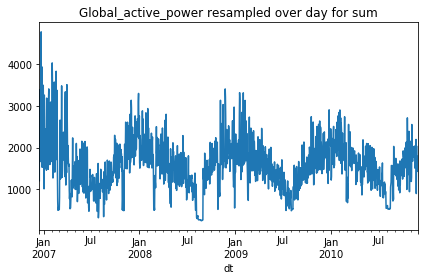

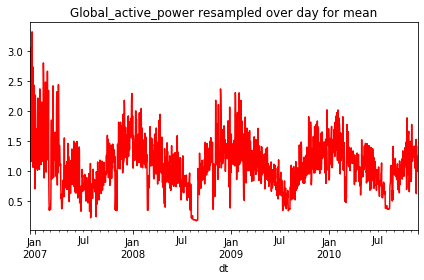

In [15]:
df.Global_active_power.resample('D').sum().plot(title = 'Global_active_power resampled over day for sum')
plt.tight_layout()
plt.show()

df.Global_active_power.resample('D').mean().plot(title = 'Global_active_power resampled over day for mean' , color='red')
plt.tight_layout()
plt.show()

# below i'll show the mean and std of 'Global_intensity' resampled over day

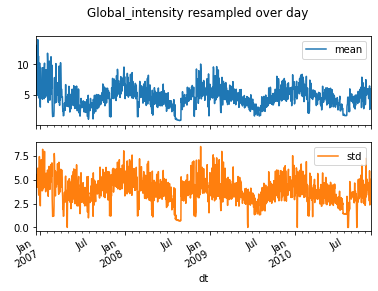

In [16]:
r = df.Global_intensity.resample('D').agg(['mean' , 'std'])
r.plot(subplots = True , title = 'Global_intensity resampled over day')
plt.show()

# below i'll show the mean and std of 'Global_reactive_power' resampled over day

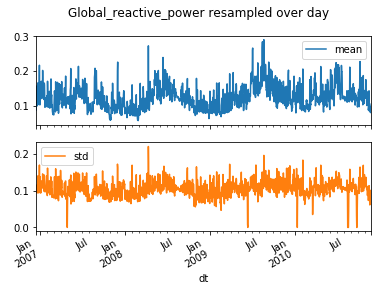

In [17]:
r2 = df.Global_reactive_power.resample('D').agg(['mean' , 'std'])
r2.plot(subplots = True , title = 'Global_reactive_power resampled over day')
plt.show()

# sum of 'Global_active_power' resampled over month

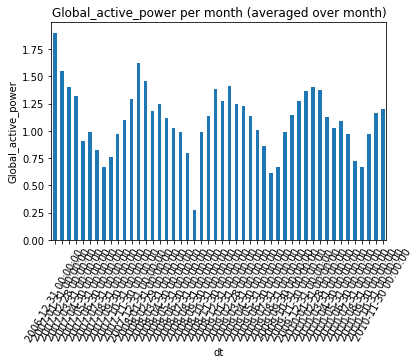

In [18]:
# sum of 'Global_active_power' resampled over month

df['Global_active_power'].resample('M').mean().plot(kind = 'bar')
plt.xticks(rotation = 60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

# sum of 'Global_active_power' resampled over Quarter

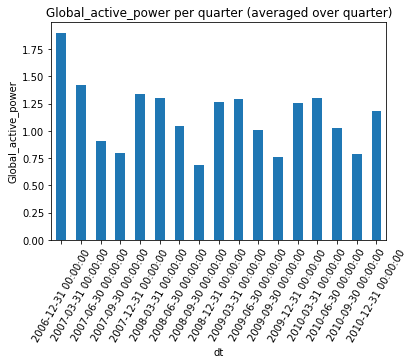

In [19]:
# sum of 'Global_active_power' resampled over Quarter

df['Global_active_power'].resample('Q').mean().plot(kind = 'bar')
plt.xticks(rotation = 60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

* it's important to not that from above two plots that resampling over larger time intervals , will diminish the periodicity of system as we expect . this is important for machine learning feature engineering .

# mean 'Voltage' resampled over month 

<function matplotlib.pyplot.show(*args, **kw)>

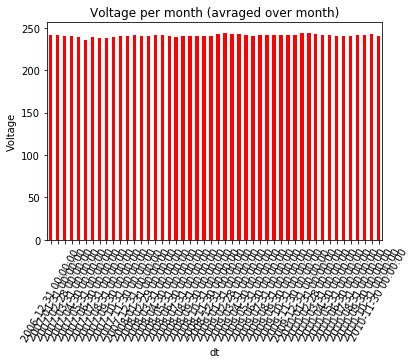

In [20]:
df['Voltage'].resample('M').mean().plot(kind = 'bar' , color = 'red')
plt.xticks(rotation = 60)
plt.ylabel('Voltage')
plt.title('Voltage per month (avraged over month)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

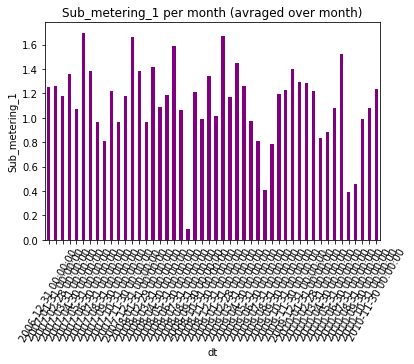

In [21]:
df['Sub_metering_1'].resample('M').mean().plot(kind = 'bar' , color = 'purple')
plt.xticks(rotation = 60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per month (avraged over month)')
plt.show


* It is seen from the above plots that the mean of 'Volage' over month is pretty much constant compared to other features. This is important again in feature selection

# Below I compare the mean of different features resampled over day.

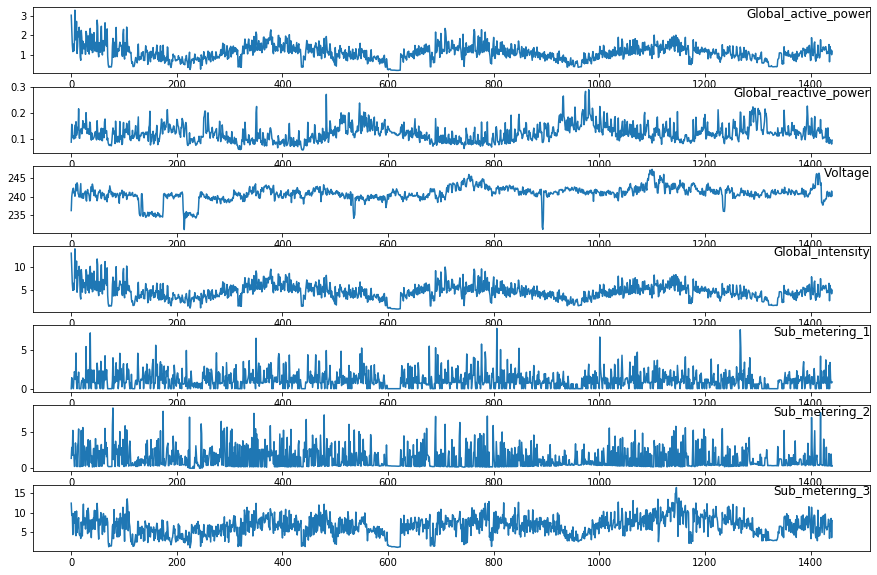

In [22]:
#specify the columns to plot 
cols = [0,1,2,3,4,5,6]
i =1
values = df.resample('D').mean().values
#plot each column 
plt.figure(figsize=(15 , 10))
for group in cols:
    plt.subplot(len(cols) , 1 , i)
    plt.plot(values[:,group])
    plt.title(df.columns[group] , y=0.75 , loc='right')
    i+=1
plt.show()    

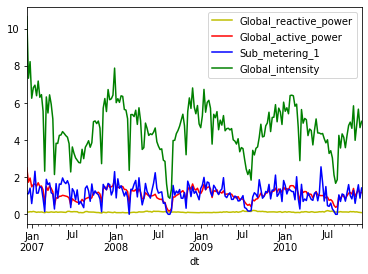

In [23]:
## resampling over week and computing mean 
df.Global_reactive_power.resample('W').mean().plot(color='y' , legend = True)
df.Global_active_power.resample('W').mean().plot(color='r' , legend = True)
df.Sub_metering_1.resample('W').mean().plot(color='b' , legend = True)
df.Global_intensity.resample('W').mean().plot(color='g' , legend = True)
plt.show()

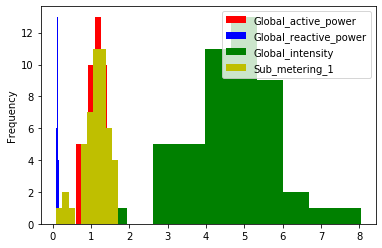

In [24]:
# Below I show hist plot of the mean of different feature resampled over month 
df.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

# the correlations between 'Global_intensity' and 'Global_active_power'

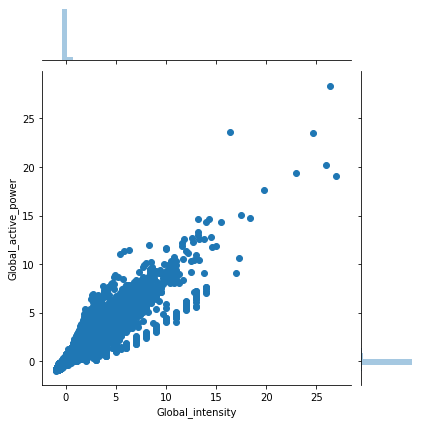

In [25]:
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity' , y='Global_active_power' , data=data_returns)
plt.show()

# the correlations between 'Vlotage' and 'Global_active_power'

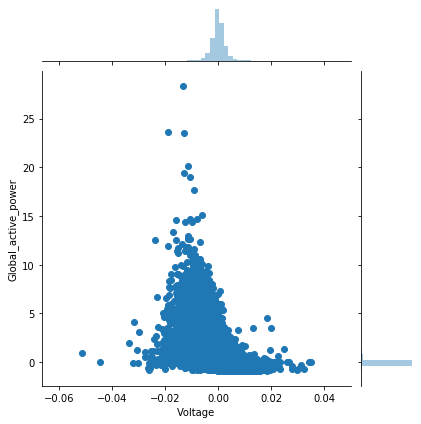

In [26]:
sns.jointplot(x='Voltage' , y='Global_active_power' , data=data_returns)
plt.show()

* From above two plots it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated. This is important observation for machine learning purpose.

# correlations among features


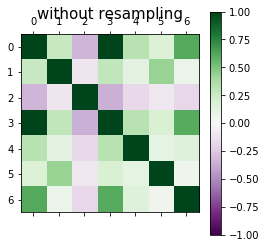

In [27]:
plt.matshow(df.corr(method='spearman') , vmax =1 , vmin=-1 , cmap='PRGn')
plt.title('without resampling' , size=15)
plt.colorbar()
plt.show()

# correlations of mean of resampled features 

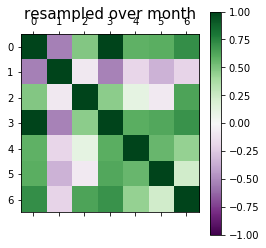

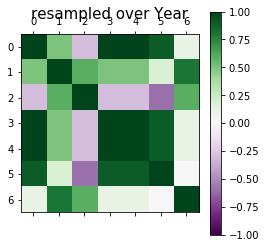

In [28]:
plt.matshow(df.resample('M').mean().corr(method='spearman') , vmax =1 , vmin=-1 , cmap='PRGn')
plt.title('resampled over month' , size =15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df.resample('A').mean().corr(method='spearman') , vmax =1 , vmin=-1 , cmap='PRGn')
plt.title('resampled over Year' , size =15)
plt.colorbar()
plt.show()


* It is seen from above that with resampling techniques one can change the correlations among features. This is important for feature engineering.



# Machine-Leaning: LSTM Data Preparation and feature engineering


* I will apply recurrent nueral network (LSTM) which is best suited for time-seriers and sequential problem. This approach is the best if we have large data.


* I will frame the supervised learning problem as predicting the Global_active_power at the current time (t) given the Global_active_power measurement and other features at the prior time step.

In [29]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data , n_in = 1 , n_out = 1 , dropnan = True):
    """
    Frame a time series as a supervised learning dataset
    Arguments:
            data :Sequence of observation as a list or numpy array 
            n_in :number of lag observations as input (x)
            n_out :number of observations as output (y)
            dropnan :boolean whether or not to drop rows with nan values
    returns:
            Pandas dataframe of series framed for supervised learning 
    """
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols , names  = list() , list()
    
    # input sequence (t-n , .... , t-1)
    for i in range(n_in , 0 , -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1 , i)) for j in range(n_vars)]
        
    #forecast sequence (t , t+1 , ... , t+n)
    for i in range(0 , n_out):
        cols.append(df.shift(-i))
        if i == 0 :
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1 , i)) for j in range(n_vars)]
            
    #put it all together 
    agg = concat(cols , axis = 1)
    agg.columns = names
    
    #drop rows with nan values 
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg            

* in order to reduce computation time and also get quick result of the model , we can resample data over hour (original data are given in minutes) , so that this will reduce the shape of data from 2075259 to 34589 but keep overall structure of data as shown in above 

In [30]:
#resampling data over hour 
df_resample = df.resample('h').mean()
df_resample.shape

(34589, 7)

* note : i'll scale all features in range of [0,1]

In [31]:
values = df_resample.values

#normalize features 
scalar = MinMaxScaler(feature_range=(0,1))
scaled = scalar.fit_transform(values)

# frame as supervised learning
reframed  = series_to_supervised(scaled , 1 , 1)
#drop columns that we don't want to predict 
reframed.drop(reframed.columns[[8,9,10,11,12,13]] , axis = 1 , inplace = True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283802   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315987   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)   var1(t)  
1   0.782418  0.545045  
2   0.782676  0.509006  
3   0.774169  0.488550  
4   0.778809  0.455597  
5   0.798917  0.322555  


* above there's 7 input varaibles (input series) , and one output variable 'Glabal_active_power' at the cirrent time in hour (depending on resampling)

# splitting the rest of data into train and validation sets 

* first , we'll split prepared dataset into train and test set , to speed up the training of the model (for the sake of demonstration), we will train the model on the first year of data , them evaluate it on next 3 years of data  

In [32]:
# splitting into train and test sets 
values  = reframed.values

n_train_time = 365*24
train = values[:n_train_time,:]
test = values[n_train_time:, :]

#split into inputs and outputs 
train_x , train_y = train[:, :-1] , train[:, -1]
test_x , test_y = test[:, :-1] , test[:, -1]

# reshape input to 3D (samples , timesteps , features)
train_x = train_x.reshape((train_x.shape[0] , 1 , train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0] , 1 , test_x.shape[1]))
print(train_x.shape , train_y.shape , test_x.shape , test_y.shape)
#we reshaped the inputs into 3d format that expected by LSTM [samples , timesteps , features]

(8760, 1, 7) (8760,) (25828, 1, 7) (25828,)


# Model Architecture 

1) LSTM with 100 neurons in the firist visible layer 

2) dropout 20%

3) 1 neuron in the output to predict Global_active_power 

4) the input shape will be 1 timestep with 7 features 

5) Mean Squared Error (MSE) as a loss function and the efficient Adam version of stochastic gradient decsent 

6) the model will be fit for 30 training epochs with batch size of 70 

Train on 8760 samples, validate on 25828 samples
Epoch 1/30
 - 3s - loss: 0.0223 - val_loss: 0.0121
Epoch 2/30
 - 1s - loss: 0.0128 - val_loss: 0.0106
Epoch 3/30
 - 1s - loss: 0.0117 - val_loss: 0.0097
Epoch 4/30
 - 1s - loss: 0.0109 - val_loss: 0.0094
Epoch 5/30
 - 1s - loss: 0.0106 - val_loss: 0.0092
Epoch 6/30
 - 1s - loss: 0.0106 - val_loss: 0.0092
Epoch 7/30
 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 8/30
 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 9/30
 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 10/30
 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 11/30
 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 12/30
 - 1s - loss: 0.0104 - val_loss: 0.0092
Epoch 13/30
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 14/30
 - 1s - loss: 0.0104 - val_loss: 0.0092
Epoch 15/30
 - 1s - loss: 0.0104 - val_loss: 0.0092
Epoch 16/30
 - 1s - loss: 0.0104 - val_loss: 0.0091
Epoch 17/30
 - 1s - loss: 0.0104 - val_loss: 0.0092
Epoch 18/30
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 19/30
 - 1s - loss

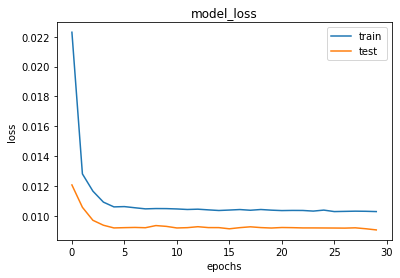

In [33]:
model = Sequential()
model.add(LSTM(100 , input_shape=(train_x.shape[1] , train_x.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error' , optimizer = 'adam')

#fit the model 

history = model.fit(train_x , train_y , epochs = 30 , batch_size=70 ,
                    validation_data = (test_x , test_y), verbose = 2 , shuffle=False)

#suumry history of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train' , 'test'] , loc='upper right')

#make predictions 
y_hat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], 7))

#invert scaling for forecasting 
inv_yhat = np.concatenate((y_hat , test_x[: , -6:]) , axis = 1)
inv_yhat = scalar.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[: , 0]

# invert scaling for actual 
test_y = test_y.reshape((len(test_y) , 1))
inv_y = np.concatenate((test_y , test_x[:,-6:]) , axis=1)
inv_y = scalar.inverse_transform(inv_y)
inv_y = inv_y[:,0]

#calculate RMSE 
RMSE = np.sqrt(mean_squared_error(inv_y , inv_yhat))
print('Test RMSE: %.3f' % RMSE)

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               43200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 43,301
Trainable params: 43,301
Non-trainable params: 0
_________________________________________________________________


In [36]:
inv_y

array([2.62663333, 2.8342    , 3.76716667, ..., 1.65933333, 1.1637    ,
       0.93466667])

In [37]:
inv_y

array([2.62663333, 2.8342    , 3.76716667, ..., 1.65933333, 1.1637    ,
       0.93466667])